<a href="https://colab.research.google.com/github/intelligencethink/Practice/blob/master/sampler_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50000, 32, 32, 3)
(100, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
airplane
automobile
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


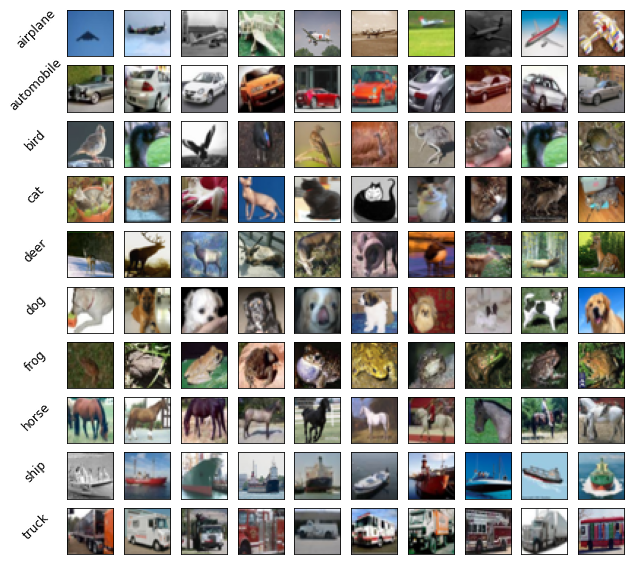

In [7]:
# Demonstrates how to sample and plot CIFAR10 images using Keras API

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
import math

# keras mnist module
from keras.datasets import cifar10

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)

class_id = 0
class_count = 0
images = None
for i in range(100):
    while True:
        index = np.random.randint(0, x_train.shape[0], size=1)
        image = x_train[index]
        if y_train[index] == class_id:
            break

    if images is None:
        images = image
    else:
        images = np.concatenate([images, image], axis=0)
    class_count += 1
    if class_count == 10:
        class_id += 1
        class_count = 0
      
print(images.shape)

plt.figure(figsize=(10, 10))
num_images = images.shape[0]
image_size = images.shape[1]
rows = int(math.sqrt(num_images))
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
print(row_names)
print(row_names[0])
print(row_names[1])
index = 0
for i in range(num_images):
    ax = plt.subplot(rows, rows, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [image_size, image_size, 3])
    plt.imshow(image)
    # plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    if (i % rows) == 0:
        ax.set_ylabel(row_names[index], rotation=45, size='large')
        ax.yaxis.labelpad = 20
        print(row_names[index])
        index += 1

# plt.tight_layout()
plt.savefig("cifar10-samples.png")
plt.show()
plt.close('all')

